In [ ]:
# importing relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
%matplotlib inline
plt.style.use('bmh')
import pickle
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# NLP libraries
import nltk
from sklearn.feature_extraction import text
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

# modeling libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from collections import Counter
from sklearn import metrics, utils, model_selection, svm

from sklearn.linear_model import LogisticRegression

from sklearn.svm import LinearSVC


In [ ]:
# loading in clean_df
clean_df = pd.read_pickle('clean_df.pkl')

In [ ]:
# previewing data
clean_df.head(3)

,total_votes,hate_speech_votes,other_votes,label,tweet,clean_tweets
0,3,0,3,0,!!! RT @mayasolovely: As a woman you shouldn't...,as a woman you shouldnt complain about clea...
1,3,0,3,0,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,boy dats coldtyga dwn bad for cuffin dat ho...
2,3,0,3,0,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,dawg you ever fuck a bitch and she sta to...


In [ ]:
# assigning variables to essential columns
data = clean_df['clean_tweets']
target = clean_df['label']

In [ ]:
import nltk
nltk.download('stopwords')
# setting NLTK stop words as `stop_words`
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import nltk
nltk.download('punkt')

# Function to tokenize and remove stop words
def preprocess_text(text):
    # Tokenize the text
    word_tokens = word_tokenize(text)

    # Remove stop words
    filtered_text = [word for word in word_tokens if word.lower() not in stop_words]

    return filtered_text

# Example usage
processed_data = clean_df['clean_tweets'].apply(preprocess_text)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
import nltk
nltk.download('wordnet')

# creating a list with all lemmatized outputs
lemmatizer = WordNetLemmatizer()
lemmatized_output = []

for listy in processed_data:
    lemmed = ' '.join([lemmatizer.lemmatize(w) for w in listy])
    lemmatized_output.append(lemmed)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
X_lem = lemmatized_output
y_lem = target

In [ ]:
# fresh TTS
X_train, X_test, y_train, y_test = train_test_split(X_lem, y_lem, test_size=0.20, random_state=20)

In [ ]:
# instantiating count vectorizer
count = CountVectorizer(stop_words='english')

In [ ]:
# fitting to the train and test set
X_train_count = count.fit_transform(X_train)
X_test_count = count.transform(X_test)

In [ ]:
# instantiate model
count_log_reg_baseline = LogisticRegression(penalty='l2', class_weight='balanced', random_state=20)

In [ ]:
count_log_reg_baseline.fit(X_train_count, y_train)
count_log_reg_test_preds = count_log_reg_baseline.predict(X_test_count)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8947


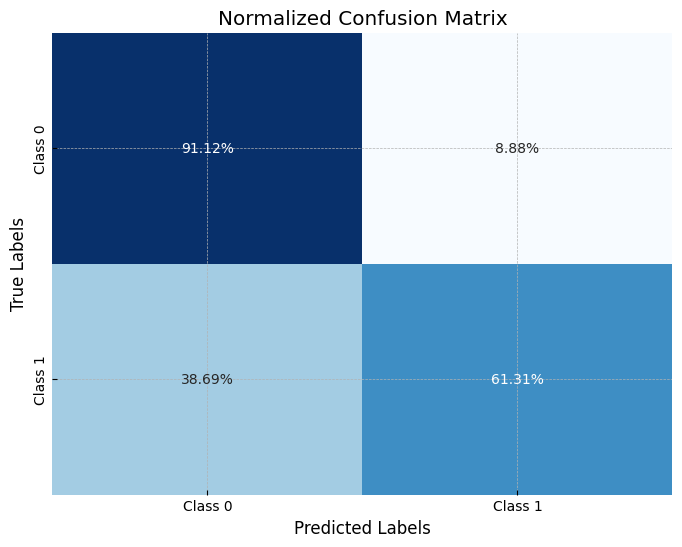

In [ ]:
# Calculate accuracy
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy = accuracy_score(y_test, count_log_reg_test_preds)
print(f'Accuracy: {accuracy:.4f}')

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, count_log_reg_test_preds)

# Calculate percentages
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]  # Calculate percentages along each row

# Plot normalized confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percent, annot=True, cmap='Blues', fmt='.2%', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Normalized Confusion Matrix')
plt.show()

In [ ]:
# Create a DataFrame for X_test_count, y_test, and predictions
results_df = pd.DataFrame({'Tweet': X_test, 'Actual': y_test, 'Predicted': count_log_reg_test_preds})

# Filter rows where model predicted 0 but actual is 1
misclassified_examples = results_df[(results_df['Predicted'] == 0) & (results_df['Actual'] == 1)]

# Print examples
print("Examples where model predicted 0 but actual is 1:")
for index, row in misclassified_examples.iterrows():
    print(f"Tweet: '{row['Tweet']}' --> Actual: {row['Actual']}, Predicted: {row['Predicted']}")

Examples where model predicted 0 but actual is 1:
Tweet: 'lame as nigga still cuffin hoe bitch got bitch er' --> Actual: 1, Predicted: 0
Tweet: 'hate hoe' --> Actual: 1, Predicted: 0
Tweet: 'yes get twitter lame negro never learned use internet' --> Actual: 1, Predicted: 0
Tweet: 'exactly shit saidgtgtgt nobody think mimi outta line inviting stevie j gay nicca v' --> Actual: 1, Predicted: 0
Tweet: 'ignorant cunt' --> Actual: 1, Predicted: 0
Tweet: 'im sure would add helpful parenthetical explanation redneck peckerwood teabaggers httpstco' --> Actual: 1, Predicted: 0
Tweet: 'love song john doe faggot' --> Actual: 1, Predicted: 0
Tweet: 'already yellow last year combined' --> Actual: 1, Predicted: 0
Tweet: 'stop flattering bitch fan ceiling' --> Actual: 1, Predicted: 0
Tweet: 'beyonc trash' --> Actual: 1, Predicted: 0
Tweet: 'bitch done u sunday nigga' --> Actual: 1, Predicted: 0
Tweet: 'crew neck as nigguh' --> Actual: 1, Predicted: 0
Tweet: 'jessica im afraid slit throat tomorrow' --> 

In [ ]:
# Filter rows where model predicted 0 but actual is 1
misclassified_examples = results_df[(results_df['Predicted'] == 1) & (results_df['Actual'] == 0)]

# Print examples
print("Examples where model predicted 1 but actual is 0:")
for index, row in misclassified_examples.iterrows():
    print(f"Tweet: '{row['Tweet']}' --> Actual: {row['Actual']}, Predicted: {row['Predicted']}")

Examples where model predicted 1 but actual is 0:
Tweet: 'nigga talkin shit around sittin quiet yous fuckin bitch dont fuck real wr' --> Actual: 0, Predicted: 1
Tweet: 'r u faggot' --> Actual: 0, Predicted: 1
Tweet: 'let faggot already cry sleep' --> Actual: 0, Predicted: 1
Tweet: 'know nigga bitch nigga got nerve twitter' --> Actual: 0, Predicted: 1
Tweet: 'act like fucking retard high mane stay away' --> Actual: 0, Predicted: 1
Tweet: 'cold nig' --> Actual: 0, Predicted: 1
Tweet: 'stupid teacher talk like he retarded' --> Actual: 0, Predicted: 1
Tweet: 'nah u fag' --> Actual: 0, Predicted: 1
Tweet: 'niggah niggah lol' --> Actual: 0, Predicted: 1
Tweet: 'say love bitch much ill kill right front' --> Actual: 0, Predicted: 1
Tweet: 'spread filth ur white dog good ol boy ltao fuckin monkey' --> Actual: 0, Predicted: 1
Tweet: 'real niccas relate fuk niccas perpetrate' --> Actual: 0, Predicted: 1
Tweet: 'chnxcplzwr hidey hidey hoe white folk noyvous round colored' --> Actual: 0, Predicted:

In [ ]:

# Test the function with an example sentence
test_fails_sentence = ['fuck Jewish people',
'Hes such a pussy cant even stand up for himsel',
'These fucking idiots dont understand basic human decency',
'I hate these fucking niggers always causing trouble',
'Shes a dumb bitch, cant believe she said that',
'good day nigga',
 'dont understand many american hate israel',
 'going to fag prideeee'
]
test_sentence_vec = count.transform(test_fails_sentence)
predicted_class =  count_log_reg_baseline.predict(test_sentence_vec)

print(f"The predicted class for the test sentence is: {predicted_class}")

The predicted class for the test sentence is: [0 0 0 0 0 1 1 1]
